In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np 
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\abidh\Downloads\oxygen_crises.csv")
data.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,galabhupesh,NaN,Twitter for Android,NaN,2021-05-09 15:40:48,True,524,@ANI When Court asked for Oxygen Audits and wh...,0,False
1,its_sreedhar,NaN,Twitter for Android,NaN,2021-05-09 15:40:48,True,217,AP gov sanctioned 310cr for 49 oxygen plants f...,0,False
2,khansahilrehab,"Patna, India",Twitter for iPhone,NaN,2021-05-09 15:40:48,False,337,@thevirdas Only Oxygen and steroids seem to wo...,0,False
3,ArunGarimella,"Vijayawada, India",Twitter for Android,NaN,2021-05-09 15:40:46,False,93,"Sir, Need Oxygen bed urgently in Vijayawada , ...",0,False
4,iprachi_singh,"Rajasthan, India",Twitter for Android,NaN,2021-05-09 15:40:45,False,926,@dulcetchani @TajinderBagga @yuvahallabol I th...,0,False


In [58]:
data = pd.DataFrame(data.text)
data.head()

,text
0,ani court near get catch say enough
1,say become operational within
2,seem work rest equivocal evidence prone ventil...
3,sir need bed urgently patient name age contact
4,think normal bed


# Data Cleaning / Pre-Processing

# Step-1 Lower Case

In [4]:
data.text = data.text.str.lower()

# Remove Url From Data

In [5]:
data['text'] = data['text'].replace(r'http\S+|www\S+', '', regex=True)

# Step-2:- Punctuation

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def remove_punctuation(abc):   # c <-- abc <-- data
    text_nopunt="".join([c   
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [8]:
data.text = data.text.apply(lambda x : remove_punctuation(x))  # x = Text 

# Remove Number

In [9]:
data.iloc[12,0]

'vasudevkulk skarkala swamy39 who said they r not spending oxygen plants concentrator ventilators temporary h… '

In [10]:
data['text'] = data['text'].replace(r'\d+', '', regex=True)

In [11]:
data.iloc[12,0]

'vasudevkulk skarkala swamy who said they r not spending oxygen plants concentrator ventilators temporary h… '

# Remove Emojis

In [12]:
data.iloc[991,0]

'bighitmusic btsbighit oppa i need oxygen 💜💜💜❤️❤️❤️💜💜💜💜🙈🙈🙈🙈💜💜💜❤️❤️❤️💜💜'

In [13]:
import emoji
data['text'] = data['text'].apply(emoji.demojize)

print(data)

                                                  text
0    ani when court asked for oxygen audits and whe...
1    ap gov sanctioned cr for  oxygen plants for al...
2    thevirdas only oxygen and steroids seem to wor...
3    sir need oxygen bed urgently in vijayawada  an...
4    dulcetchani tajinderbagga yuvahallabol i think...
..                                                 ...
995   oxygen concentrator for a population above  c...
996  need a oxygen cylinder urgently\nkindly help\n...
997  hospitalbeds ahmedabad\n\ncivil hospital ahmed...
998          kimggugie no im here but i need oxygen rn
999  please help me my father want oxygen cylinder ...

[1000 rows x 1 columns]


In [14]:
data.iloc[991,0]

'bighitmusic btsbighit oppa i need oxygen :purple_heart::purple_heart::purple_heart::red_heart::red_heart::red_heart::purple_heart::purple_heart::purple_heart::purple_heart::see-no-evil_monkey::see-no-evil_monkey::see-no-evil_monkey::see-no-evil_monkey::purple_heart::purple_heart::purple_heart::red_heart::red_heart::red_heart::purple_heart::purple_heart:'

# Removing Stop Words

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
print("No.of StopWords :",len(stop))
stop

No.of StopWords : 179


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abidh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['text'] = data['text'].apply(lambda x: ' '.join([abc   # x = Text 
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

# Common Words

In [17]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\abidh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [18]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('AAP|JDU|BJP|Congress', '', text) #remove delhipolice
    text =  re.sub('Govt|Goverment','', text)
    text =  re.sub('oxygen|Oxygen','', text)
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad & aA
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return text

In [19]:
data = pd.DataFrame(data.text.apply(lambda x: clean_text_round2(x)))
data.iloc[991,0]

'need see see see see'

# Lemmatization

In [20]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET

lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abidh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(text)]

In [22]:
data.text = data.text.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[991,0]

'need see see see see'

In [23]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['text'] = data['text'].apply(lambda x: ' '.join([abc   # x = Text 
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

# Strip Extra Whitespace

In [24]:
data['text'] = (data['text'].astype("str").str.rstrip())
data.iloc[991,0]

'need see see see see'

In [25]:
data = data.drop_duplicates('text') 
data

,text
0,ani court near get catch say enough
1,say become operational within
2,seem work rest equivocal evidence prone ventil...
3,sir need bed urgently patient name age contact
4,think normal bed
...,...
993,next couple days hospital house start operatio...
994,black market
995,concentrator population crore
997,civil hospital general


# Document Term Matrix

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # TERM = KEY WORDS

tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,889,890,891,892,893,894,895,896,897,898
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
tdm['freq'] = tdm.sum(axis=1)
tdm.reset_index(inplace=True)
tdm

,index,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,freq
0,abide,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,absence,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,absolute,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,yoga,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1346,yogi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1347,young,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1348,youve,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
tdm1 = tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(10)

,Word,freq
778,need,120
540,hospital,78
248,covid,68
104,bed,63
521,help,60
836,people,49
267,cylinder,49
1072,sir,43
655,level,41
833,patient,41


In [29]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31629 words in the combination of all review.


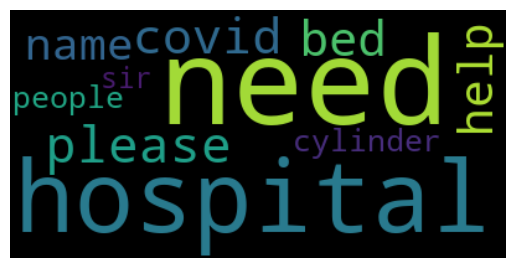

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
abc = WordCloud(stopwords=stopwords,
                      background_color="black",
                      collocations=False,
                      mode="RGBA",  # r = red , g = green , b = blue
                      max_words=10).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

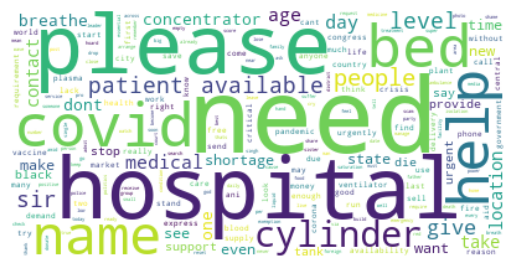

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
abc = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      mode="RGBA",
                      max_words=36436).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentimental Analysis

In [32]:
from textblob import TextBlob

data['polarity'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity) # polarity range -1 to +1
data.head(5)

,text,polarity
0,ani court near get catch say enough,0.05
1,say become operational within,0.00
2,seem work rest equivocal evidence prone ventil...,0.00
3,sir need bed urgently patient name age contact,0.00
4,think normal bed,0.15


In [33]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,text,polarity,Sentiment
0,ani court near get catch say enough,0.05,Positive
1,say become operational within,0.00,Positive
2,seem work rest equivocal evidence prone ventil...,0.00,Positive
3,sir need bed urgently patient name age contact,0.00,Positive
4,think normal bed,0.15,Positive


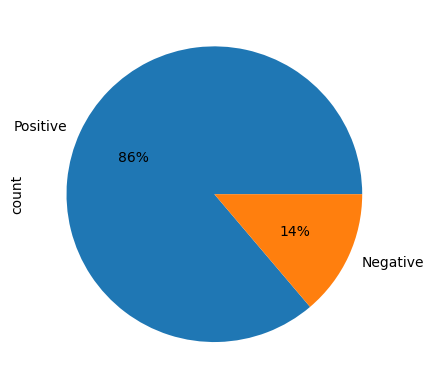

In [34]:
data.Sentiment.value_counts().plot.pie(autopct="%0.0f%%");

In [35]:
data.head()

,text,polarity,Sentiment
0,ani court near get catch say enough,0.05,Positive
1,say become operational within,0.00,Positive
2,seem work rest equivocal evidence prone ventil...,0.00,Positive
3,sir need bed urgently patient name age contact,0.00,Positive
4,think normal bed,0.15,Positive


# Machine Learning Model

In [36]:
data_dtm['Sentiment'] = data.Sentiment
data_dtm.head()

,abide,ability,able,absence,absolute,absolutely,abundance,access,accomplish,accord,...,yeah,year,yes,yesterday,yoga,yogi,young,youve,zinc,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       899 non-null    object 
 1   polarity   899 non-null    float64
 2   Sentiment  899 non-null    object 
dtypes: float64(1), object(2)
memory usage: 60.4+ KB


# Data Partition

In [38]:
from sklearn.model_selection import train_test_split

x = data_dtm.drop(['Sentiment'],axis=1)
y = data_dtm['Sentiment']

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

In [39]:
missing_values_X_train = X_train.isna().sum()
print("Missing values in X_train:\n", missing_values_X_train)

Missing values in X_train:
 abide       0
ability     0
able        0
absence     0
absolute    0
           ..
yoga        0
yogi        0
young       0
youve       0
zinc        0
Length: 1350, dtype: int64


In [40]:
missing_values_y_train = y_train.isna().sum()
print("\nMissing values in y_train:\n", missing_values_y_train)


Missing values in y_train:
 63


In [41]:
# Fill NaN values in X_train with mode for each column
X_train = X_train.apply(lambda x: x.fillna(x.mode()[0]) if x.isna().sum() > 0 else x)

# Verify that NaN values have been filled
print("\nMissing values in X_train after filling NaNs:\n", X_train.isna().sum())


Missing values in X_train after filling NaNs:
 abide       0
ability     0
able        0
absence     0
absolute    0
           ..
yoga        0
yogi        0
young       0
youve       0
zinc        0
Length: 1350, dtype: int64


In [42]:
# Fill NaN values in y_train with mode
y_train_mode = y_train.mode()[0]
y_train.fillna(y_train_mode, inplace=True)

# Verify that NaN values have been filled
print("\nMissing values in y_train after filling NaNs:\n", y_train.isna().sum())


Missing values in y_train after filling NaNs:
 0


In [43]:
# Check the value counts of the Sentiment column
sentiment_counts = data['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Positive    775
Negative    124
Name: count, dtype: int64


# Model Building 

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',
            
                                 max_depth=4)  #branches)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [45]:
features=cv.get_feature_names_out()
features

array(['abide', 'ability', 'able', ..., 'young', 'youve', 'zinc'],
      dtype=object)

In [46]:
# Assuming cv is your CountVectorizer or similar vectorizer and you've already fitted it
features = cv.get_feature_names_out()

# Convert the features to a list
features_list = features.tolist()

print(features_list)

['abide', 'ability', 'able', 'absence', 'absolute', 'absolutely', 'abundance', 'access', 'accomplish', 'accord', 'accountable', 'accuse', 'act', 'action', 'active', 'actor', 'actual', 'actually', 'add', 'addition', 'additional', 'address', 'adjunct', 'administration', 'admission', 'admit', 'adorable', 'advance', 'affect', 'afford', 'age', 'agree', 'aid', 'aint', 'air', 'airhead', 'alive', 'allergy', 'allocate', 'allocation', 'allotment', 'ally', 'alternative', 'alum', 'ambassador', 'ambulance', 'amend', 'ami', 'amid', 'amplify', 'android', 'anger', 'angina', 'ani', 'announce', 'answer', 'anti', 'anxiety', 'anyways', 'apparently', 'appear', 'applause', 'area', 'argument', 'arjun', 'army', 'arrange', 'arrival', 'article', 'ask', 'aspire', 'ass', 'assistance', 'assurance', 'atlantic', 'attend', 'attendant', 'attention', 'attorney', 'audit', 'augmentation', 'aunt', 'avail', 'availability', 'available', 'average', 'avertible', 'awa', 'away', 'baba', 'baby', 'backbone', 'bad', 'badly', 'bahu

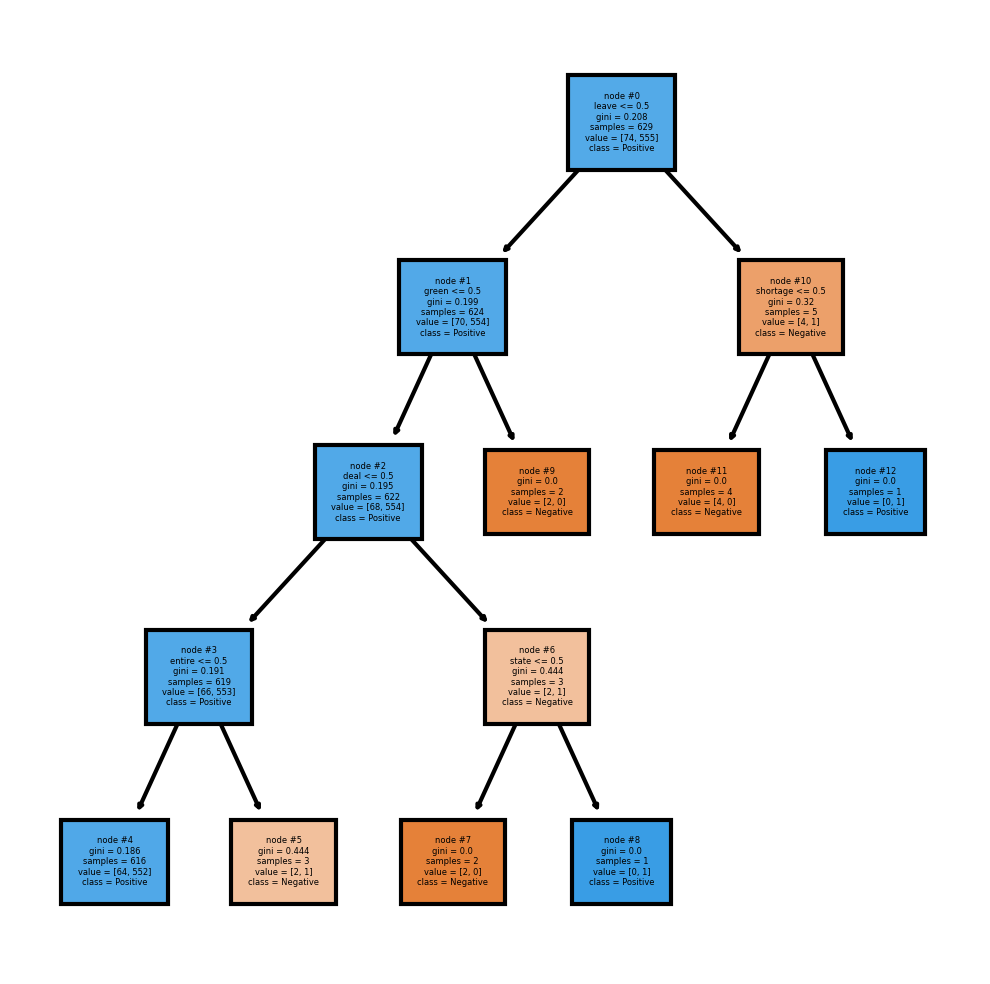

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Define the class names (modify these based on your actual classes)
Sentiment = ['Negative', 'Positive']

# Convert the features array to a list
features_list = features.tolist()

# Plot the decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
plot_tree(classifier,
          feature_names=features_list,  # Use the list of feature names
          class_names=Sentiment,
          filled=True,
          node_ids=True,
          fontsize=2)

# Show the plot
plt.show()

# Predictions on Train Data

In [48]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,abide,ability,able,absence,absolute,absolutely,abundance,access,accomplish,accord,...,yeah,year,yes,yesterday,yoga,yogi,young,youve,zinc,Sentiment
724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [49]:
train['Predicted'] = classifier.predict(X_train)
train.head()

,abide,ability,able,absence,absolute,absolutely,abundance,access,accomplish,accord,...,year,yes,yesterday,yoga,yogi,young,youve,zinc,Sentiment,Predicted
724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive


In [50]:
from sklearn.metrics import classification_report
print(classification_report(train['Predicted'],train['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.14      0.91      0.24        11
    Positive       1.00      0.90      0.94       618

    accuracy                           0.90       629
   macro avg       0.57      0.90      0.59       629
weighted avg       0.98      0.90      0.93       629



# Prediction on Test Data

In [51]:
# Check for missing values in X_train
missing_values_X_test = X_test.isna().sum()
print("Missing values in X_test:\n", missing_values_X_test)

Missing values in X_test:
 abide       0
ability     0
able        0
absence     0
absolute    0
           ..
yoga        0
yogi        0
young       0
youve       0
zinc        0
Length: 1350, dtype: int64


In [52]:
X_test = X_test.apply(lambda x: x.fillna(x.mode()[0]) if x.isna().sum() > 0 else x)

# Verify that NaN values have been filled
print("\nMissing values in X_train after filling NaNs:\n", X_test.isna().sum())



Missing values in X_train after filling NaNs:
 abide       0
ability     0
able        0
absence     0
absolute    0
           ..
yoga        0
yogi        0
young       0
youve       0
zinc        0
Length: 1350, dtype: int64


In [53]:
# Fill NaN values in y_train with mode
y_test_mode = y_test.mode()[0]
y_test.fillna(y_test_mode, inplace=True)

# Verify that NaN values have been filled
print("\nMissing values in y_train after filling NaNs:\n", y_test.isna().sum())



Missing values in y_train after filling NaNs:
 0


In [54]:
# Check for missing values in y_train
missing_values_y_test = y_test.isna().sum()
print("\nMissing values in y_test:\n", missing_values_y_test)


Missing values in y_test:
 0


In [55]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,abide,ability,able,absence,absolute,absolutely,abundance,access,accomplish,accord,...,yeah,year,yes,yesterday,yoga,yogi,young,youve,zinc,Sentiment
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
667,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Positive
292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [56]:
test['Predicted'] = classifier.predict(X_test)
test.head()

,abide,ability,able,absence,absolute,absolutely,abundance,access,accomplish,accord,...,year,yes,yesterday,yoga,yogi,young,youve,zinc,Sentiment,Predicted
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
667,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Positive,Positive
292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive


In [57]:
from sklearn.metrics import classification_report
print(classification_report(test['Predicted'],test['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.03      0.50      0.05         2
    Positive       1.00      0.87      0.93       268

    accuracy                           0.87       270
   macro avg       0.51      0.69      0.49       270
weighted avg       0.99      0.87      0.92       270



# FINISHED BHAT ABID 